In [1]:
%pylab inline
import numpy as np
import wave
import matplotlib.pyplot as plt
import scipy.io.wavfile
import operator
from IPython.display import Audio

Populating the interactive namespace from numpy and matplotlib


# Audio File Matching

This notebook continues the audio file matching problem. Be sure to have song.wav and clip.wav in the same directory as the notebook.

In this notebook, we will look at the problem of searching for a small audio clip inside a song.

The song "Mandelbrot Set" by Jonathan Coulton is licensed under <a href="http://creativecommons.org/licenses/by-nc/3.0/">CC BY-NC 3.0</a>

If you have trouble playing the audio file in IPython, try opening it in a different browser. I encountered problem with Safari but Chrome works for me.

In [2]:
import numpy as np
import wave
import matplotlib.pyplot as plt
import scipy.io.wavfile
import operator
from IPython.display import Audio
%matplotlib inline

given_file = 'song.wav'
target_file = 'clip.wav'
rate_given,  given_signal  = scipy.io.wavfile.read(given_file)
rate_target, target_signal = scipy.io.wavfile.read(target_file)
given_signal  = given_signal[:2000000].astype(float)
target_signal = target_signal.astype(float)
def play_clip(start, end, signal=given_signal):
    scipy.io.wavfile.write('temp.wav', rate_given, signal[start:end].astype(np.int16))
    return Audio(url='temp.wav', autoplay=True)

def run_comparison(target_signal, given_signal, idxs=None):
    # Run everything if not called with idxs set to something
    if idxs is None:
        idxs = [i for i in range(len(given_signal)-len(target_signal))]
    return idxs, [vector_compare(target_signal, given_signal[i:i+len(target_signal)])
                for i in idxs]

play_clip(0, len(given_signal))

#scipy.io.wavfile.write(target_file, rate_given, (-0.125*given_signal[1380000:1380000+70000]).astype(np.int16))

We will load the song into the variable `given_signal` and load the short clip into the variable `target_signal`. Your job is to finish code that will identify the short clip's location in the song. The clip we are trying to find will play after executing the following block.

In [3]:
Audio(url=target_file, autoplay=True)

Your task is to define the function 'vector_compare' and run the following code. Because the song has a lot of data, you should use the provided examples from the previous parts of the problem before running the later code. Do you results here make sense given your answers to previous parts of the problem?

In [23]:
def vector_compare(desired_vec, test_vec):
    """This function compares two vectors, returning a number.
    The test vector with the highest return value is regarded as being closest to the desired vector."""
    # The transpose is a gotcha! Stupid numpy
    # your code here
    """diff = 0
    for x in range(len(test_vec)):
        diff += abs(desired_vec[x] - test_vec[x])
    if diff == 0:
        return 1.01
    else:
        return 1/diff""" #THIS DOESNT WORK, SO TRYING NEW THING BELOW:
    if np.array_equal(desired_vec, test_vec):
        return 1
    else:
        return np.dot(desired_vec,test_vec)/(np.linalg.norm(desired_vec)*np.linalg.norm(test_vec))*(1/np.linalg.norm(desired_vec-test_vec))
            

print("PART A:")
print(vector_compare(np.array([1,1,1]), np.array([1,1,1])))
print(vector_compare(np.array([1,1,1]), np.array([-1,-1,-1])))
print("PART C:")
print(vector_compare(np.array([1,2,3]), np.array([1,2,3])))
print(vector_compare(np.array([1,2,3]), np.array([2,3,4])))
print(vector_compare(np.array([1,2,3]), np.array([3,4,5])))
print(vector_compare(np.array([1,2,3]), np.array([4,5,6])))
print(vector_compare(np.array([1,2,3]), np.array([5,6,7])))
print(vector_compare(np.array([1,2,3]), np.array([6,7,8])))

PART A:
1
-0.288675134595
PART C:
1
0.573068255061
0.283683257307
0.187567986254
0.139766348005
0.111241002164


# Problem 1
Run the following code that runs `vector_compare` on every subsequence in the song- it will probably take at least 5 minutes. How do you interpret this plot to find where the clip is in the song?

That took 4.26 minutes to run


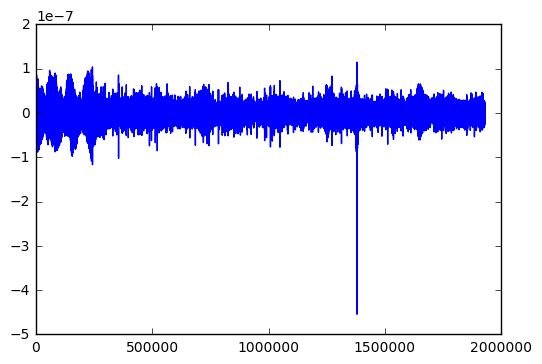

In [24]:
import time

t0 = time.time()
idxs, song_compare = run_comparison(target_signal, given_signal)
t1 = time.time()
plt.plot(idxs, song_compare)
print ("That took %(time).2f minutes to run" % {'time':(t1-t0)/60.0} )

# Problem 2
In the space below, write code that uses `song_compare` to print the index of `given_signal` where `target_signal` begins. Then, verify that your answer is correct by playing the song at that index using the `play_clip` function.

In [27]:
# your code here
#Print index
max_corr = np.argmax(song_compare)
print(max_corr)
print(len(target_signal)+ max_corr)

#Play it
play_clip(max_corr,len(target_signal)+ max_corr, target_signal )

1380284
1450284


# GPS Locationing

In [5]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


In [6]:
## RUN THIS FUNCTION BEFORE YOU START THIS PROBLEM
## This function will generate the gold code associated with the satellite ID using linear shift registers
## The satellite_ID can be any integer between 1 and 24
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    shamt = delay[satellite_ID - 1]
    G2_out = np.roll(MLS2,shamt)
    
    CA_code = G1_out * G2_out
    
    return CA_code

[-1. -2. -1. ..., -1. -2. -1.]


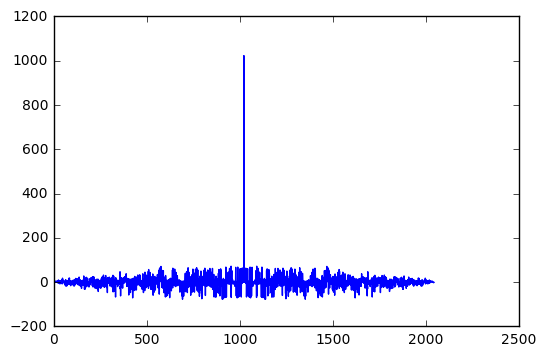

In [17]:
## PART A CODE HERE
def array_correlation(array1,array2):
    """ This function should return two arrays or a matrix with one row corresponding to 
    the offset and other to the correlation value
    """
    ## INSERT YOUR CODE HERE
    ## Use np.correlate with "FULL". Check out the helper page for it 
    offset_array = list(range(len(array1)+len(array2)-1)) 
    correlation_value = np.correlate(array1, array2, mode="full")
    return(offset_array, correlation_value)
    
# Plot the auto-correlation of satellite 10 with itself. Your signal should be centered
# at offset = 0.
# Use plt.plot or plt.stem to plot.
_, corr = array_correlation(Gold_code_satellite(10), Gold_code_satellite(10))
print(corr)
plt.plot(np.arange(len(corr)), corr)

[-1. -2. -1. ..., -3. -2. -1.]


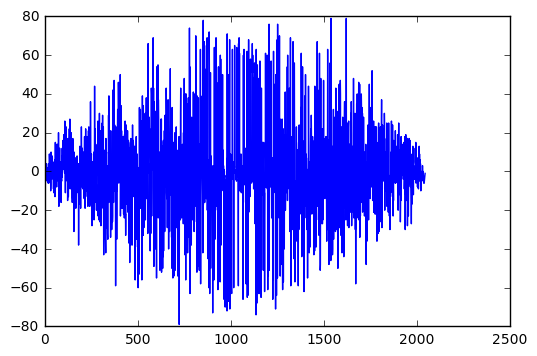

In [18]:
## PART B CODE HERE
_, corr = array_correlation(Gold_code_satellite(10), Gold_code_satellite(13))
print(corr)
plt.plot(np.arange(len(corr)), corr)

[-1. -2. -1. ...,  1.  2.  1.]


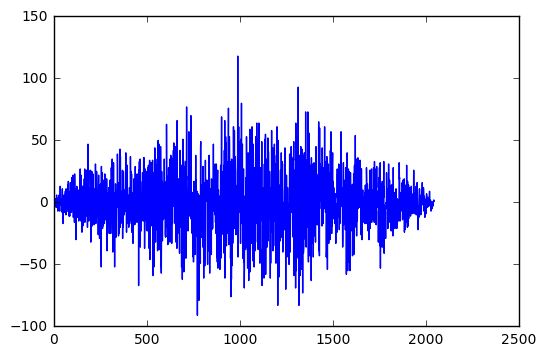

In [19]:
## PART C CODE HERE
## THIS IS A HELPER FUNCTION FOR PART C
def integernoise_generator(length_of_noise):
    noise_array = np.random.randint(2,size = length_of_noise)
    noise_array = 2*noise_array - np.ones(size(noise_array))
    return noise_array

ten = Gold_code_satellite(10)
_, corr = array_correlation(ten, integernoise_generator(len(ten)))
print(corr)
plt.plot(np.arange(len(corr)), corr)

[-0.26832599 -0.22721151  1.01258948 ..., -1.87434826 -0.57010434
 -0.34232715]


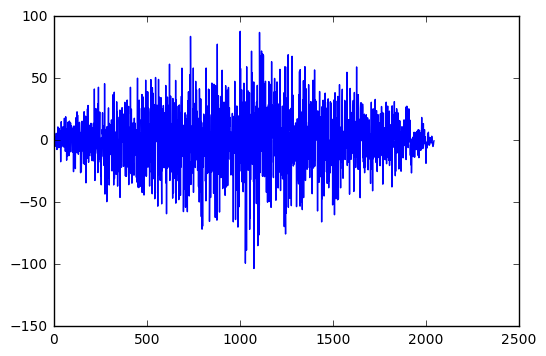

In [21]:
## PART D CODE HERE
## THIS IS A HELPER FUNCTION FOR PART D
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0,1,length_of_noise)
    return noise_array

_, corr = array_correlation(Gold_code_satellite(10), gaussiannoise_generator(1023))
print(corr)
plt.plot(np.arange(len(corr)), corr)

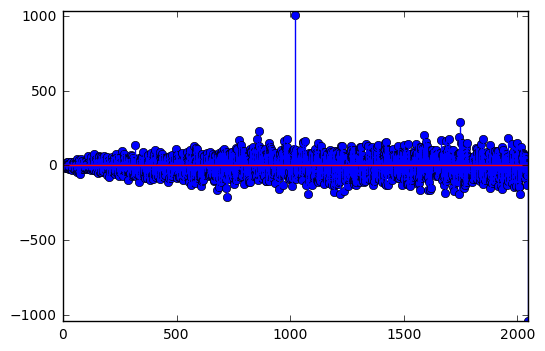

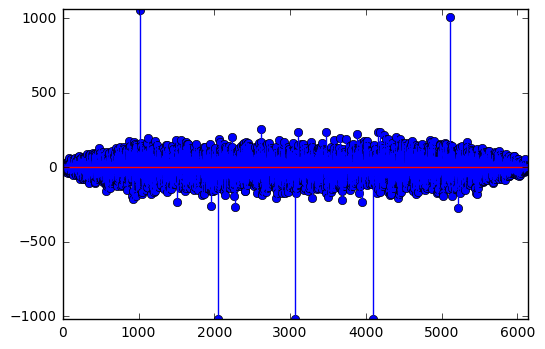

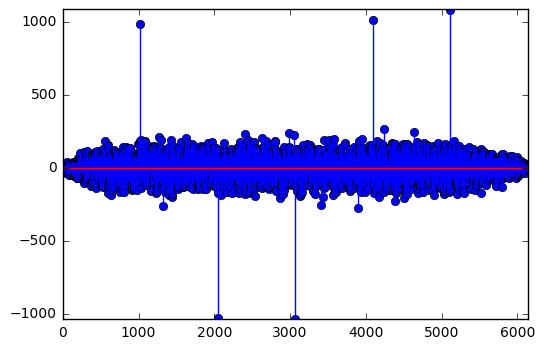

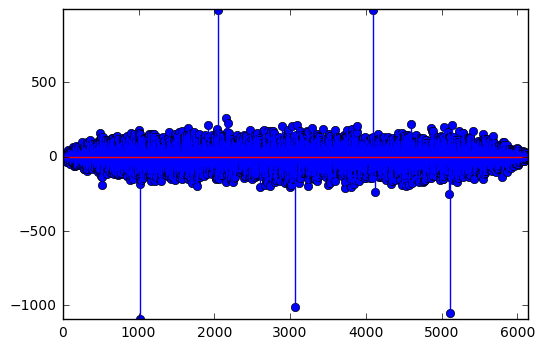

[4, 7, 13, 19]


In [23]:
## PART E CODE HERE
## USE 'np.load' FUNCTION TO LOAD THE DATA
## USE DATA1.NPY AS THE SIGNAL ARRAY

satellites = []
signal = np.load("data1.npy")
for i in range(1, 25):
    _, corr = array_correlation(signal, Gold_code_satellite(i))
    if min(corr) < -500 or max(corr) > 500: #if a peak
        satellites.append(i)
        #plt.plot(np.arange(len(corr)), corr)
        plt.axis([-1, len(x), min(corr) - 1, max(corr) + 1]) 
        x = np.arange(len(corr))
        plt.stem(x, corr, "b-", "bo")
        plt.show()
        
print(satellites)

[ 0.1823331  -0.14363724 -0.93911872 ..., -0.26802293  1.41068829
 -1.46613957]


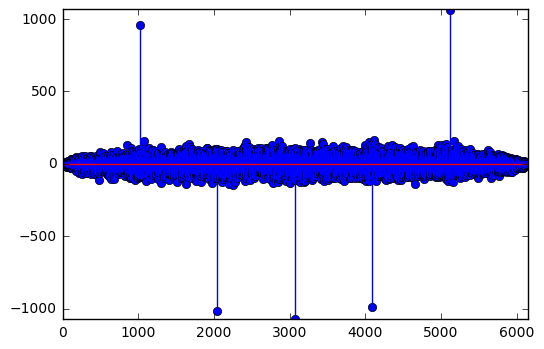

Satellite: 3


In [24]:
## PART F CODE HERE
## USE DATA2.NPY AS THE SIGNAL ARRAY
satellites, signal = [], np.load("data2.npy")
print(signal)
for i in range(1, 25):
    offset, y = array_correlation(signal, Gold_code_satellite(i))
    if min(y) < -500 or max(y) > 500:
        satellites.append(i)
        plt.axis([0, len(x) + 10, min(y) - 1, max(y) + 1]) 
        x = np.arange(len(y))
        plt.stem(x, y, "b-", "bo")
        plt.show()
print("Satellite:", satellites[0])

[-1.97847561  0.32305173  0.5788338  ..., -0.19858476 -1.50222466
 -0.68688047]


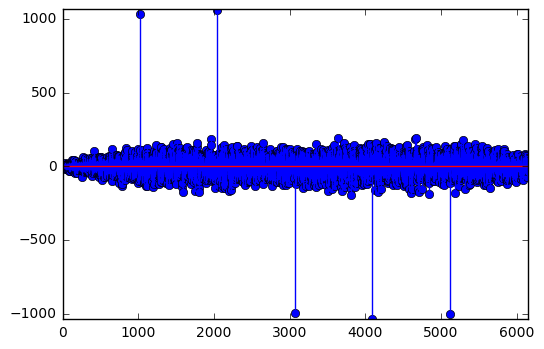

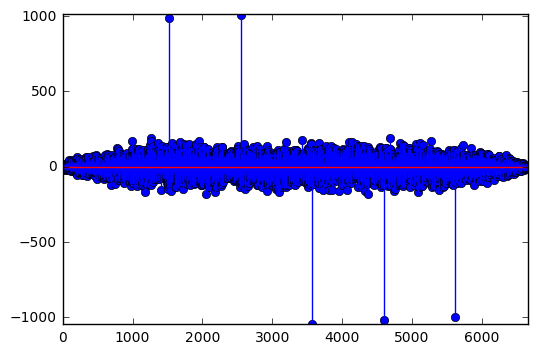

Satellites: [5, 20]
Delays: [1022, 2045, 3068, 4091, 5114, 1528, 2551, 3574, 4597, 5620]


In [25]:
## PART G CODE HERE
## USE DATA3.NPY AS THE SIGNAL ARRAY
satellites, signal = [], np.load("data3.npy")
print(signal)
for i in range(1, 25):
    offset, y = array_correlation(signal, Gold_code_satellite(i))
    if min(y) < -500 or max(y) > 500:
        satellites.append(i)
        plt.axis([0, len(x)+10, min(y)-1, max(y)+1]) 
        x = np.arange(len(y))
        plt.stem(x, y, "b-", "bo")
        plt.show()
print("Satellites:", satellites)


delays = []
for sat in satellites:
    rel_delay, y = array_correlation(signal, Gold_code_satellite(sat))
    for i in range(len(y)):
        if y[i] > 500 or y[i] < -500:
            delays.append(rel_delay[i])
print("Delays:", delays)